In [2]:
# Modules
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal as sig
from scipy import optimize as opt
import peakutils
from lmfit.models import LorentzianModel, GaussianModel

# Load XRD text file

data = np.loadtxt('188_XRD.txt')
csv  = pd.read_csv('Phys-PK1_Si.csv', header = 29).to_numpy()


#print(data)
print((csv))

[[ 25.015 306.   ]
 [ 25.032 267.   ]
 [ 25.049 289.   ]
 ...
 [ 84.957  72.   ]
 [ 84.974  68.   ]
 [ 84.991  63.   ]]


In [3]:
# Extracting x, y data from data array
x_data = data[:, 0]
y_data = data[:, 1]
x_csv_data = csv[:, 0]
y_csv_data = csv[:, 1]
print(x_csv_data)

# Create a dictionary of values
results = dict(zip(x_data, y_data))
#print (results)

# Remove y data results with a value less than 0
results_condensed = {key:val for key, val in results.items() if val > 0.005}

# Form a 2D data arrray of condensed results
data_array = np.array(list(results_condensed.items()))
#print(data_array)

[25.015 25.032 25.049 ... 84.957 84.974 84.991]


In [4]:
# Extract x and y data from data array for plotting
x_array = data_array[:, 0]
y_array = data_array[:, 1]
print(x_array)
print(y_array)

[25.008 25.059 25.093 ... 69.939 69.956 69.973]
[0.012836  0.016136  0.010291  ... 0.0081276 0.0081276 0.0088589]


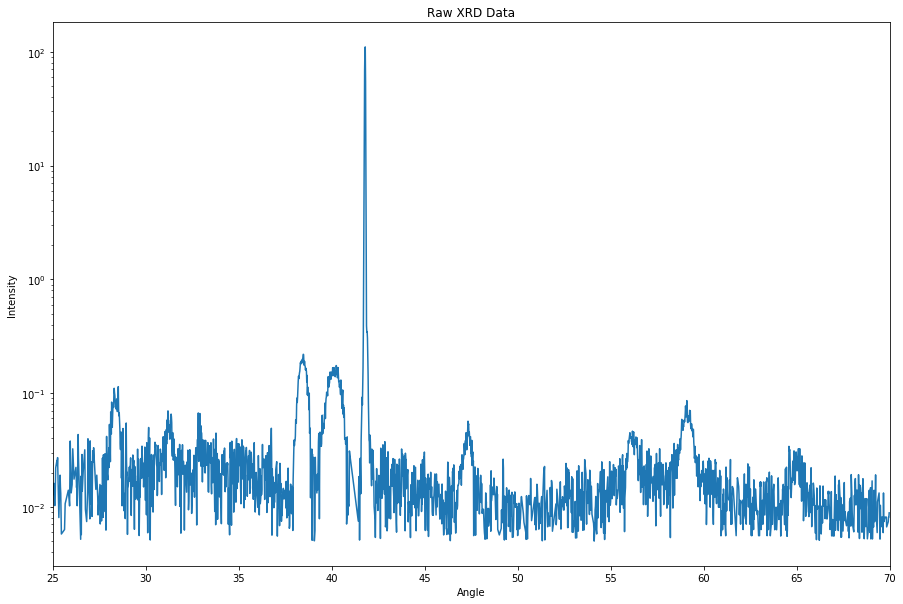

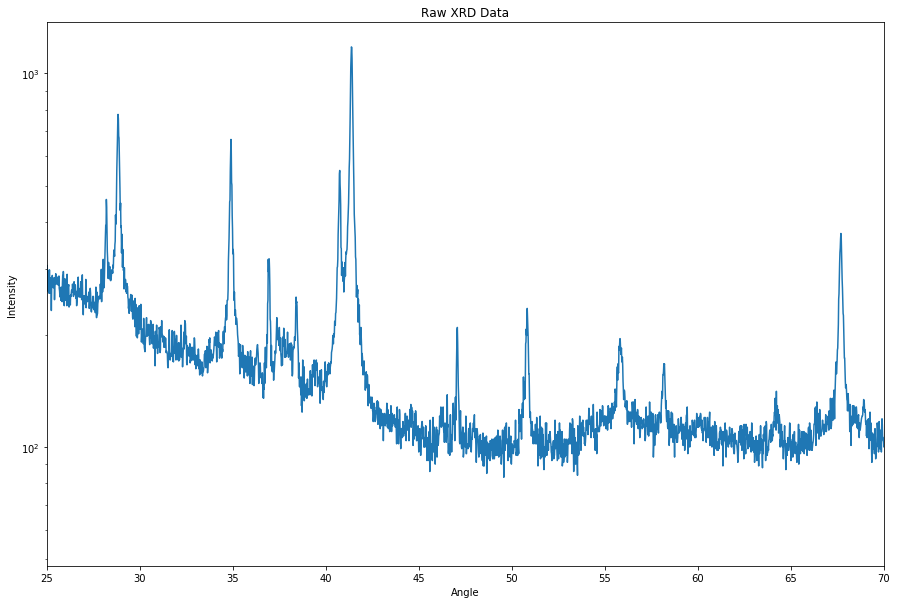

In [5]:
# Plot of raw data 
plt.subplots(figsize=(15, 10))
plt.plot(x_array, y_array)
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Raw XRD Data')
plt.xlim(25, 70)
plt.show()

plt.subplots(figsize=(15, 10))
plt.plot(x_csv_data, y_csv_data)
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Raw XRD Data')
plt.xlim(25, 70)
plt.show()

In [6]:
# Smoothing function of raw data
def smooth(data, win_size, polynomial):  # win_size = no. of data points of subset, polynomial = degree of polynomail
    smoothed_data = sig.savgol_filter(data, win_size, polynomial)
    return smoothed_data

smoothed_y_data = smooth(y_array, 9, 1) # Change first integer to determine the degree of smoothing

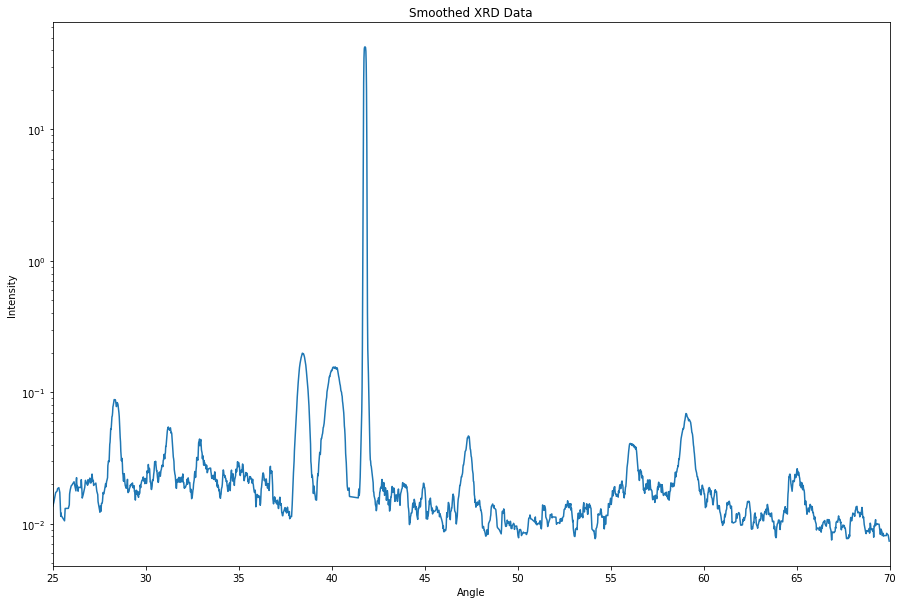

In [7]:
# Plotting smoothed data
ax1 = plt.subplots(figsize = (15, 10))
plt.plot(x_array, smoothed_y_data)
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Smoothed XRD Data')
plt.xlim(25, 70)
plt.show()

In [8]:
# Find peaks in data, thres = min height of y data, min_dist
peaks = peakutils.indexes(smoothed_y_data, thres = 0.05, min_dist = 50, thres_abs = True) 
print(peaks)
peak_indicies = sig.find_peaks_cwt(smoothed_y_data, widths = (4, 10), gap_thresh = 1, min_snr = 1.5, noise_perc = 8)
print(peak_indicies)


[  95  249  645  746  811 1629]
[   5    8   95  100  108  208  253  258  341  457  555  557  648  746
  812  926  979 1053 1097 1134 1250 1252 1291 1338 1458 1547 1577 1629
 1633 1795 1891 1894 2056 2106 2114]


In [9]:
indexes = peakutils.indexes(smoothed_y_data, thres=0.5, min_dist=30)

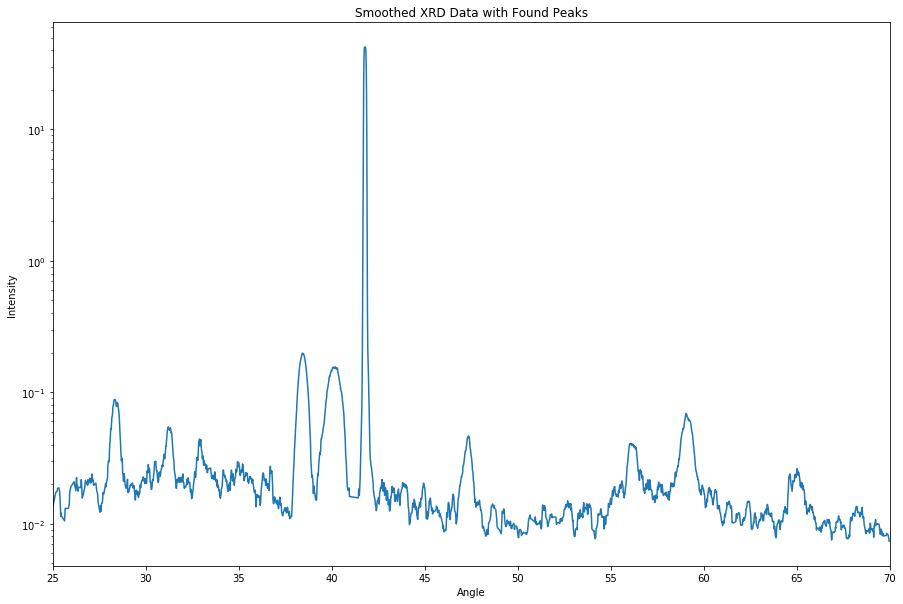

In [11]:
# Plot data with found peaks
plt.subplots(figsize = (15, 10))
plt.plot(x_array, smoothed_y_data)
plt.yscale('log')
plt.xlim(25, 70)
#plt.scatter(x_array[peaks], smoothed_y_data[peaks], marker ='x', color = 'red', s = 100)
#plt.scatter(x_array[peak_indicies], smoothed_y_data[peak_indicies], color = 'green')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Smoothed XRD Data with Found Peaks')
plt.show()

In [22]:
# Fit Model

gauss_1 = GaussianModel(prefix ='g1_')
par = gauss_1.guess(smoothed_y_data, x = x_array)

gauss_2 = GaussianModel(prefix = 'g2_')
par.update(gauss_2.make_params())
par['g2_center'].set(value = 32.0)
par['g2_sigma'].set(value = 10.0)
par['g2_amplitude'].set(value = 100000, min = 1.0)

gauss_3 = GaussianModel(prefix = 'g3_')
par.update(gauss_3.make_params())
par['g3_center'].set(value = 36.0)
par['g3_sigma'].set(value = 10.0)
par['g3_amplitude'].set(value = 100000, min = 1.0)

gauss_4 = GaussianModel(prefix='g4_')
par.update(gauss_4.make_params())
par['g4_center'].set(value = 38.0)
par['g4_sigma'].set(value = 10.0)
par['g4_amplitude'].set(value = 100000, min = 1.0)

gauss_5 = GaussianModel(prefix = 'g5_')
par.update(gauss_5.make_params())
par['g5_center'].set(value = 40.0)
par['g5_sigma'].set(value = 10.0)
par['g5_amplitude'].set(value = 100000, min = 1.0)

lorentz_1 = LorentzianModel(prefix='l1_')
par.update(lorentz_1.make_params())
par['l1_center'].set(value = 44)
par['l1_sigma'].set(value = 10.0)
par['l1_amplitude'].set(value = 100000, min = 1.0)

gauss_6 = GaussianModel(prefix='g6_')
par.update(gauss_6.make_params())
par['g6_center'].set(value = 47.0)
par['g6_sigma'].set(value = 10.0)
par['g6_amplitude'].set(value = 100000, min = 1.0)

gauss_7 = GaussianModel(prefix='g7_')
par.update(gauss_7.make_params())
par['g7_center'].set(value = 55.0)
par['g7_sigma'].set(value = 10.0)
par['g7_amplitude'].set(value = 100000, min = 1.0)

gauss_8 = GaussianModel(prefix='g8_')
par.update(gauss_8.make_params())
par['g8_center'].set(value = 59.0)
par['g8_sigma'].set(value = 10.0)
par['g8_amplitude'].set(value = 100000, min = 1.0)

gauss_9 = GaussianModel(prefix = 'g9_')
par.update(gauss_9.make_params())
par['g9_center'].set(value = 65.0)
par['g9_sigma'].set(value = 10.000)
par['g9_amplitude'].set(value = 1000, min = 1.0)

In [25]:
model = gauss_1 + gauss_2 + gauss_3 + gauss_4 + gauss_5 + gauss_6 + gauss_7 + gauss_8 + gauss_9 + lorentz_1
out = model.fit(smoothed_y_data, par, x = x_array)

In [26]:
print(out.fit_report())

[[Model]]
    (((((((((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_')) + Model(gaussian, prefix='g5_')) + Model(gaussian, prefix='g6_')) + Model(gaussian, prefix='g7_')) + Model(gaussian, prefix='g8_')) + Model(gaussian, prefix='g9_')) + Model(lorentzian, prefix='l1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 417
    # data points      = 2118
    # variables        = 30
    chi-square         = 265.022741
    reduced chi-square = 0.12692660
    Akaike info crit   = -4342.07638
    Bayesian info crit = -4172.32956
##  Warning: uncertainties could not be estimated:
[[Variables]]
    g1_amplitude:  6.77272234 (init = 8.661203)
    g1_center:     41.7928769 (init = 41.787)
    g1_sigma:      0.05671546 (init = 0.068)
    g1_fwhm:       0.13355470 == '2.3548200*g1_sigma'
    g1_height:     47.6400156 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amp

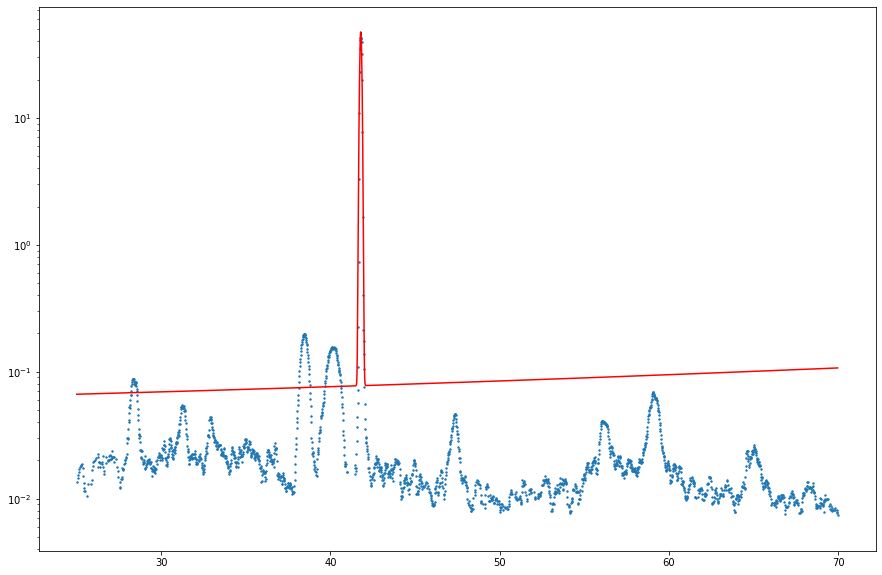

In [29]:
plt.subplots(figsize = (15, 10))
plt.scatter(x_array, smoothed_y_data, 2)
plt.plot(x_array, out.best_fit, color = 'red')
plt.yscale('log')